In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
# Load Training Data
df_train = pd.read_csv("train.csv")
df_train_encoded = df_train.copy()
df_train_encoded['Sex'] = LabelEncoder().fit_transform(df_train_encoded["Sex"])

# Load Testing Data
df_test = pd.read_csv("test.csv")
df_test_encoded = df_test.copy()
df_test_encoded['Sex'] = LabelEncoder().fit_transform(df_test_encoded["Sex"])

In [3]:
# Quick check function (print)
def print_limits(dataframe, cols):

    for col in cols:
        if col == "Sex":
            print(f"Sex = {dataframe['Sex'].unique()}")
        else:
            print(f"{col} Min = {dataframe[col].min()} and {col} Max = {dataframe[col].max()}")

# Check column data for quick validation ##
cols = ["id", "Sex", "Age", "Height", "Duration", "Heart_Rate", "Body_Temp"]#, "Calories"]

# Check train & test data
print("Training Data Limits:")
print_limits(df_train_encoded, cols)
print("")
print("Testing Data Limits:")
print_limits(df_test_encoded, cols)

Training Data Limits:
id Min = 0 and id Max = 749999
Sex = [1 0]
Age Min = 20 and Age Max = 79
Height Min = 126.0 and Height Max = 222.0
Duration Min = 1.0 and Duration Max = 30.0
Heart_Rate Min = 67.0 and Heart_Rate Max = 128.0
Body_Temp Min = 37.1 and Body_Temp Max = 41.5

Testing Data Limits:
id Min = 750000 and id Max = 999999
Sex = [1 0]
Age Min = 20 and Age Max = 79
Height Min = 127.0 and Height Max = 219.0
Duration Min = 1.0 and Duration Max = 30.0
Heart_Rate Min = 67.0 and Heart_Rate Max = 128.0
Body_Temp Min = 37.1 and Body_Temp Max = 41.5


                  id            Sex            Age         Height  \
count  750000.000000  750000.000000  750000.000000  750000.000000   
mean   374999.500000       0.499039      41.420404     174.697685   
std    216506.495284       0.499999      15.175049      12.824496   
min         0.000000       0.000000      20.000000     126.000000   
25%    187499.750000       0.000000      28.000000     164.000000   
50%    374999.500000       0.000000      40.000000     174.000000   
75%    562499.250000       1.000000      52.000000     185.000000   
max    749999.000000       1.000000      79.000000     222.000000   

              Weight       Duration     Heart_Rate      Body_Temp  \
count  750000.000000  750000.000000  750000.000000  750000.000000   
mean       75.145668      15.421015      95.483995      40.036253   
std        13.982704       8.354095       9.449845       0.779875   
min        36.000000       1.000000      67.000000      37.100000   
25%        63.000000       8.0000

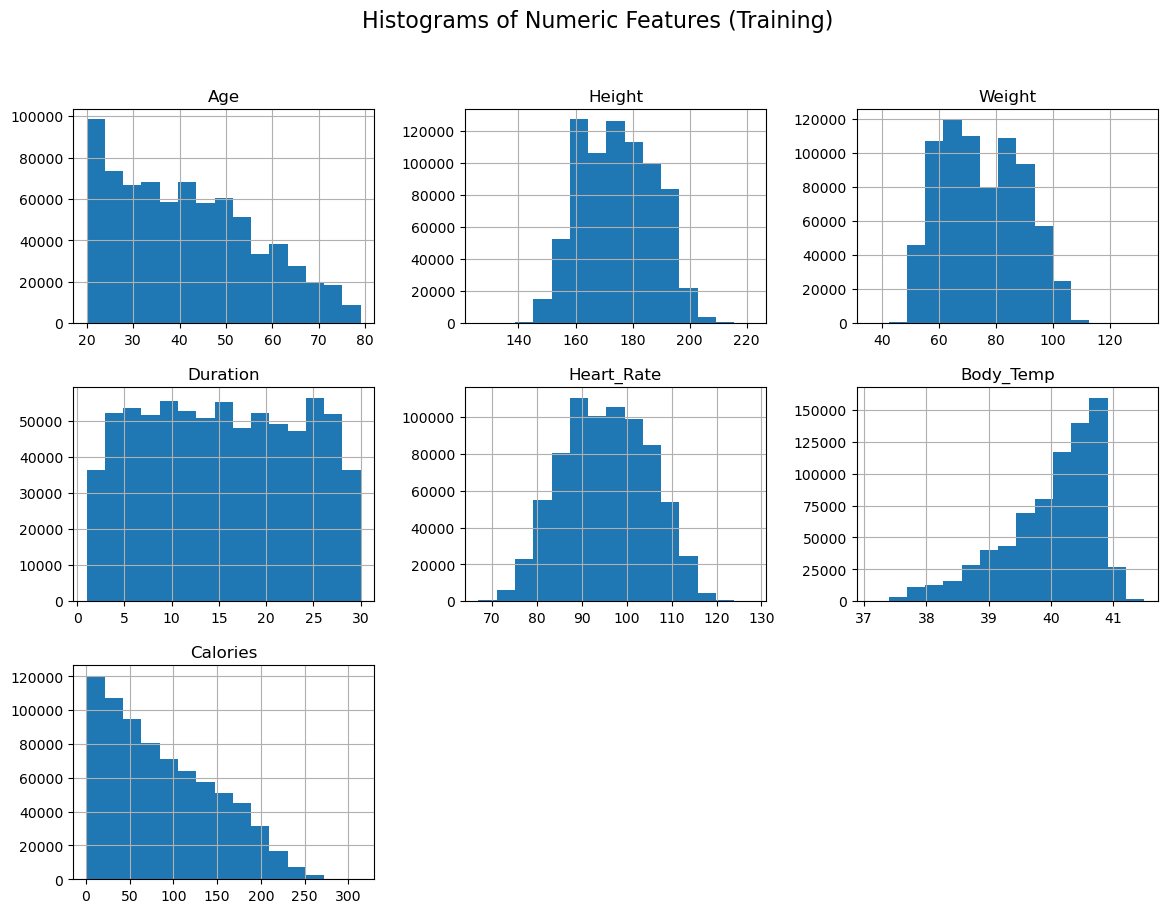

In [4]:
# Print statistical characteristics
print(df_train_encoded.describe())

# Plot distributions of column data
numeric_cols = ["Age", "Height", "Weight", "Duration", "Heart_Rate", "Body_Temp", "Calories"]
df_train_encoded[numeric_cols].hist(bins=15, figsize=(14, 10))
plt.suptitle("Histograms of Numeric Features (Training)", fontsize=16)
plt.show()


                  id            Sex            Age         Height  \
count  250000.000000  250000.000000  250000.000000  250000.000000   
mean   874999.500000       0.498876      41.452464     174.725624   
std     72168.927986       0.500000      15.177769      12.822039   
min    750000.000000       0.000000      20.000000     127.000000   
25%    812499.750000       0.000000      28.000000     164.000000   
50%    874999.500000       0.000000      40.000000     174.000000   
75%    937499.250000       1.000000      52.000000     185.000000   
max    999999.000000       1.000000      79.000000     219.000000   

              Weight       Duration     Heart_Rate      Body_Temp  
count  250000.000000  250000.000000  250000.000000  250000.000000  
mean       75.147712      15.415428      95.479084      40.036093  
std        13.979513       8.349133       9.450161       0.778448  
min        39.000000       1.000000      67.000000      37.100000  
25%        63.000000       8.000000   

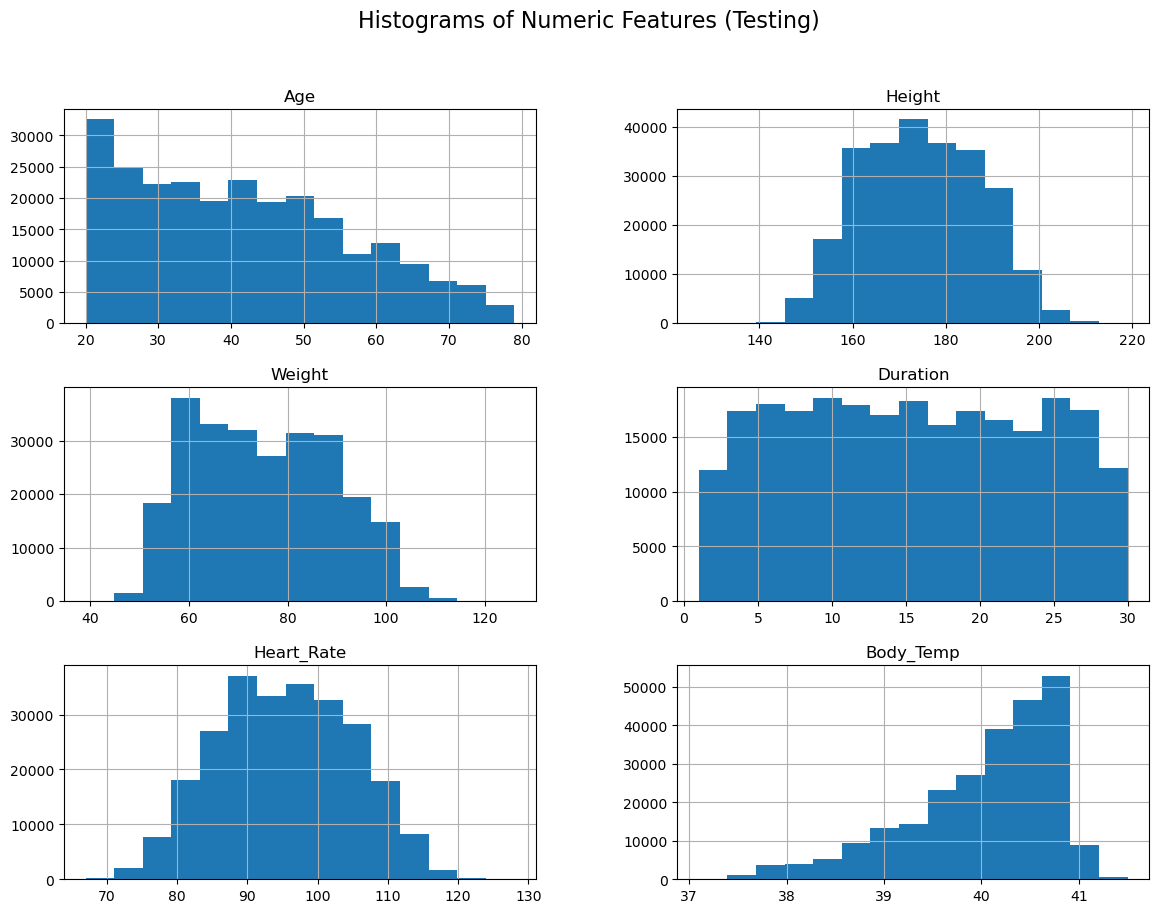

In [5]:
# Print statistical characteristics
print(df_test_encoded.describe())

# Plot distributions of column data
numeric_cols = ["Age", "Height", "Weight", "Duration", "Heart_Rate", "Body_Temp"]#, "Calories"]
df_test_encoded[numeric_cols].hist(bins=15, figsize=(14, 10))
plt.suptitle("Histograms of Numeric Features (Testing)", fontsize=16)
plt.show()

In [6]:
comparison = df_train_encoded.describe() / df_test_encoded.describe()
comparison = comparison.drop('id', axis=1)
comparison = comparison.drop('Calories', axis=1)
print(comparison)

            Age  Body_Temp  Duration  Heart_Rate    Height       Sex    Weight
count  3.000000   3.000000  3.000000    3.000000  3.000000  3.000000  3.000000
mean   0.999227   1.000004  1.000362    1.000051  0.999840  1.000326  0.999973
std    0.999821   1.001833  1.000594    0.999967  1.000192  0.999999  1.000228
min    1.000000   1.000000  1.000000    1.000000  0.992126       NaN  0.923077
25%    1.000000   1.000000  1.000000    1.000000  1.000000       NaN  1.000000
50%    1.000000   1.000000  1.000000    1.000000  1.000000       NaN  1.000000
75%    1.000000   1.002463  1.000000    1.000000  1.000000  1.000000  1.000000
max    1.000000   1.000000  1.000000    1.000000  1.013699  1.000000  1.047619


## Model Selection

We need to determine the best regression model/approach for this particular problem. What we have determined from the above is:

1. The test set is comparable to the training set, i.e. we are not really extrapolating a prediction (the only feature with a different range is weight).
2. We can observe some variable are highly correlated, and thus, we do contain a degree of redundant data which may cause overfitting, to mitigate this we can enfore regularization or simply remove redundant features using dimensionality reduction such as PCA.

Since we need to predict a target, we will be evaluation the below candidate regression models:

1. Linear Regression
2. Ridge / Lasso Regression (i.e. penalization)
3. DecisionTreeRegressor
4. RandomForestRegressor
5. GradientBoostingRegressor
6. XGBoost / LightGBM

Additionally, we will use the below performance metrics:

1. R^2, i.e. how well the model explains the variance.
2. RMSE, which penalizes large fit errors.
3. RMSLE, required by the competition, which adjusts for skewed targets (which the Calories target is).

In [43]:
## Data preprocessing

# Encode male/female to 1/0
df = df_train_encoded.copy()

# Define features & objective
X = df.drop("Calories", axis=1)
X = df.drop("id", axis=1)
Y = df["Calories"]

# Standardize input data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data further for internal validation
X_train, X_val, Y_train, Y_val = train_test_split(X_scaled, Y, test_size=0.2)

In [11]:
## Define the required performance measures
from sklearn.metrics import mean_squared_error, r2_score

# RMSLE (no standard function)
def rmsle(y_true, y_pred):
    y_pred = np.maximum(0, y_pred)
    return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true)) ** 2))

# Package into a function to print all measures (RMSLE, RMSE, R2)
def evaluate_model(model, X_train, Y_train, X_val, Y_val):
    model.fit(X_train, Y_train)
    preds = model.predict(X_val)
    print(f"Model: {model.__class__.__name__}")
    print("R²:", r2_score(Y_val, preds))
    print("RMSE:", np.sqrt(mean_squared_error(Y_val, preds)))
    print("RMSLE:", rmsle(Y_val, preds))
    print("-" * 40)

In [12]:
## Define the required regression models for analysis
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

# List of models
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor()
]

# Iterative loop
for model in models:
    evaluate_model(model, X_train, Y_train, X_val, Y_val)

Model: LinearRegression
R²: 0.9684039640724551
RMSE: 11.093249516044445
RMSLE: 0.5580525960417143
----------------------------------------
Model: Ridge
R²: 0.9684039643293441
RMSE: 11.093249470948082
RMSLE: 0.5580522715496273
----------------------------------------
Model: Lasso
R²: 0.9624164265124502
RMSE: 12.098778265581224
RMSLE: 0.5676529557158815
----------------------------------------
Model: DecisionTreeRegressor
R²: 0.992725526461443
RMSE: 5.32283821533838
RMSLE: 0.08661060174193268
----------------------------------------
Model: RandomForestRegressor
R²: 0.996169251152122
RMSE: 3.862640785093362
RMSLE: 0.06351435049413788
----------------------------------------
Model: GradientBoostingRegressor
R²: 0.9942992883015866
RMSE: 4.712018870532809
RMSLE: 0.1339815570788176
----------------------------------------


## Model Tuning

From the above, it appears the RandomForestRegressor performs best without any optimization, and is thus a likely candidate.
We will now aim to tune the hyperparameters and evaluate improvement.

In [13]:
## Hyperparameter Optimization using gridsearch
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_log_error

rmsle_scorer = make_scorer(rmsle, greater_is_better=False)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize model
rf = RandomForestRegressor()

# Grid search
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring=rmsle_scorer,
    cv=3,  # or cv=5 for more robust results
    n_jobs=-1,  # use all cores
    verbose=2
)

# Run search
#grid_search.fit(X_train, Y_train)

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import numpy as np

# Define the model
rf = RandomForestRegressor(random_state=42)

# Define the hyperparameter distributions
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Setup the randomized search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,  # Try 30 random combinations
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit the search to the data
random_search.fit(X_train, Y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000024FC31C6F20>},
                   random_state=42, verbose=2)

In [16]:
# Best parameters
print("Best parameters found:", random_search.best_params_)

# Best estimator for future predictions
best_rf_model = random_search.best_estimator_

Best parameters found: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 406}


## Refining the Tuned Model

In [45]:
# Use the best params
best_rf = RandomForestRegressor(
    max_depth=None,
    max_features='log2',
    min_samples_leaf=1,
    min_samples_split=10,
    n_estimators=406,
    random_state=42
)

best_rf.fit(X_train, Y_train)
y_pred = best_rf.predict(X_val)


(array([35299., 28300., 22811., 19566., 16319., 14727.,  8959.,  3228.,
          741.,    50.]),
 array([  1.        ,  31.55536145,  62.11072289,  92.66608434,
        123.22144578, 153.77680723, 184.33216868, 214.88753012,
        245.44289157, 275.99825302, 306.55361446]),
 <BarContainer object of 10 artists>)

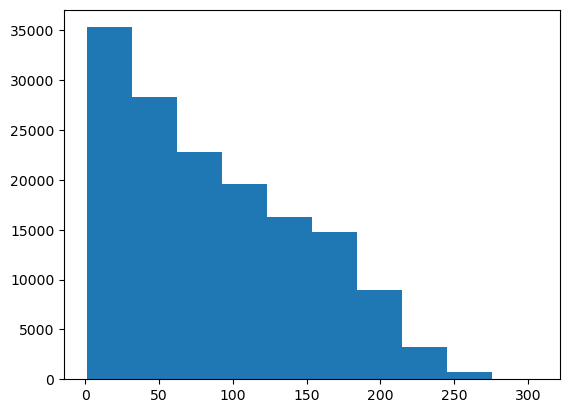

In [46]:
plot_range = np.arange(len(y_pred))
#plt.scatter(plot_range, y_pred)
plt.hist(y_pred)

In [47]:
rmsle_best_rf = rmsle(Y_val, y_pred)
print(rmsle_best_rf)

0.008224187527244986


In [ ]:
# Split data further for internal validation
#X_train, X_val, Y_train, Y_val = train_test_split(X_scaled, Y, test_size=0.2)

In [ ]:
# Use the best params
#best_rf = RandomForestRegressor(
#    max_depth=None,
#    max_features='log2',
#    min_samples_leaf=1,
#    min_samples_split=5,
#    n_estimators=187,
#    random_state=42
#)

#best_rf.fit(X_train, Y_train)
#y_pred = best_rf.predict(X_val)

In [ ]:
#rmsle_best_rf = rmsle(Y_val, y_pred)
#print(rmsle_best_rf)

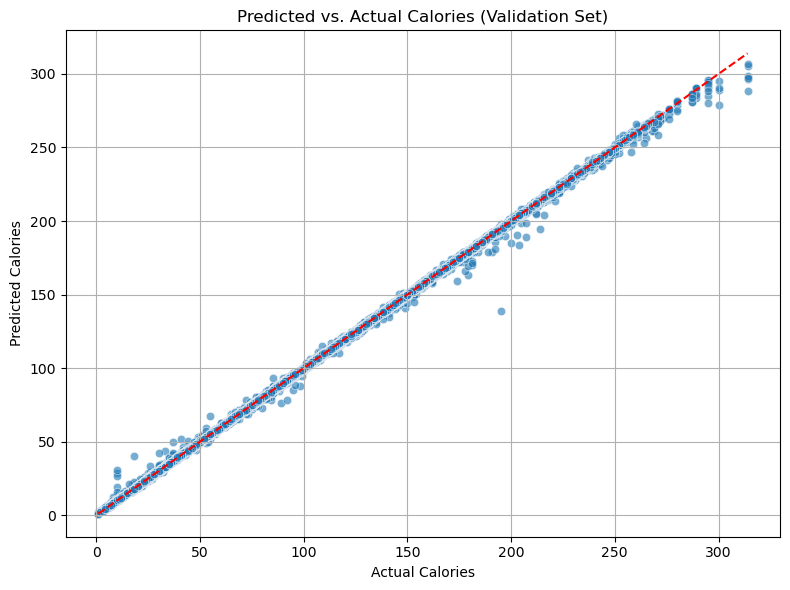

In [48]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Y_val, y=y_pred, alpha=0.6)
plt.plot([Y_val.min(), Y_val.max()], [Y_val.min(), Y_val.max()], 'r--')  # identity line
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Predicted vs. Actual Calories (Validation Set)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Create the submission DataFrame using the actual IDs from df_test
df_test_1 = df_test_encoded.copy()

# Ensure feature columns match training
features = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Sex']
X_test = df_test_1[features]

# Define features & objective
print(np.shape(X_val))
#X_sub = df_test_1
print(np.shape(X_test))
print("")

rf_best_pred = best_rf.predict(X_test)
#y_pred = best_rf.predict(X_val)

plt.hist(rf_best_pred)

submission = pd.DataFrame({
    'id': df_test_encoded['id'],
    'Calories': rf_best_pred
})

(150000, 8)
(250000, 7)



c:\Users\Brad\anaconda3\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


ValueError: X has 7 features, but RandomForestRegressor is expecting 8 features as input.

In [ ]:
# Export to CSV
#submission.to_csv('submission_3.csv', index=False)
#print("✅ Submission file created using IDs from df_test!")

✅ Submission file created using IDs from df_test!


<Axes: >

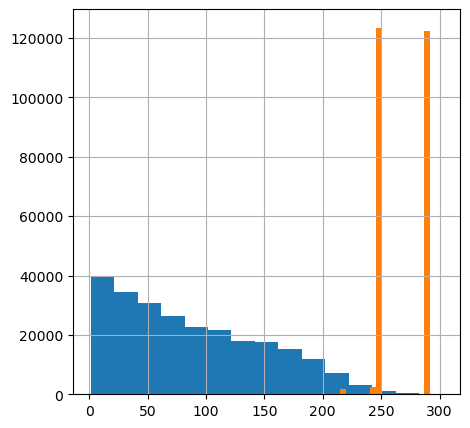

In [26]:
submission_1 = pd.read_csv("submission.csv")
submission_2 = pd.read_csv("submission_2.csv")

submission_1['Calories'].hist(bins=15, figsize=(5, 5))
submission_2['Calories'].hist(bins=15, figsize=(5, 5))

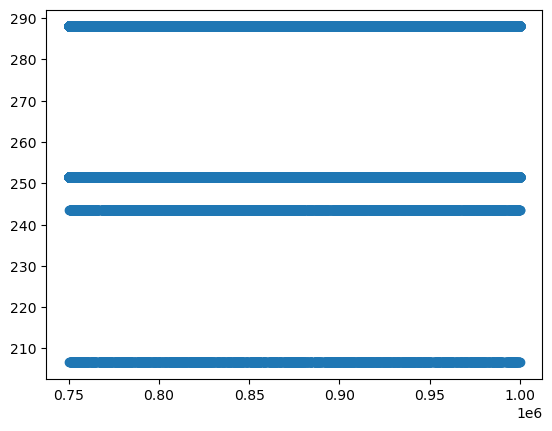

In [29]:
plt.scatter(df_test_encoded['id'], rf_best_pred)